# Import des bibliothèques nécessaires

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Présentation de la problématique et importation des données

## Présentation de la problématique


Le jeu de données "California Housing" contient des informations sur les logements en Californie, aux États-Unis, ainsi que leur valeur. 
L'objectif de ce jeu de projet **prédire la valeur des logements en fonction de leurs caractéristiques**.



Le fichier de données peut être téléchargé à partir de la page Kaggle suivante : [California Housing](https://www.kaggle.com/harrywang/housing)



Les variables présentes dans le jeu de données sont les suivantes :

- `longitude` : Longitude de la localisation du logement
- `latitude` : Latitude de la localisation du logement
- `housing_median_age` : Âge médian des logements dans la région
- `total_rooms` : Nombre total de chambres dans la région
- `total_bedrooms` : Nombre total de chambres à coucher dans la région
- `population` : Population totale dans la région
- `households` : Nombre total de ménages dans la région
- `median_income` : Revenu médian des ménages dans la région
- `median_house_value` : Valeur médiane des maisons dans la région
- `ocean_proximity` : Proximité de la maison par rapport à l'océan (côte, île, etc.)









## Importation et nettoyage des données

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv',sep=";",decimal=",")

In [2]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                52.0         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [3]:
#Information sur la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


In [4]:
#Analyse des données manquantes
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Description des tables
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
# On suppose que les régions qui ont la variable total_bedooms manquantes n'ont pas de chambre
# Remplacement des valeurs manquantes par 0 pour la variable 'total_bedrooms'
data['total_bedrooms'].fillna(0, inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Description des biens de la base de données

## Description des variables numériques

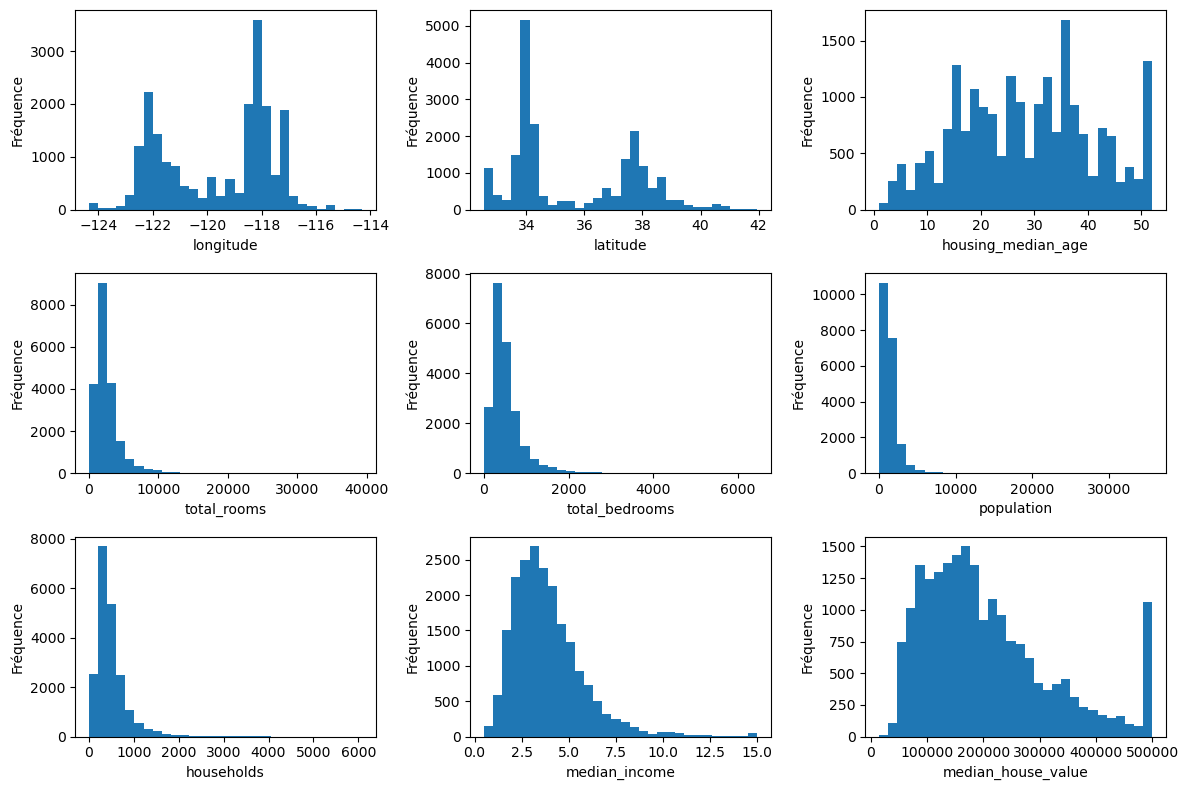

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
# Description univariée des variables numériques

# Sélection des variables quantitatives
quant_vars = data.select_dtypes(include=np.number).columns

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].hist(data[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


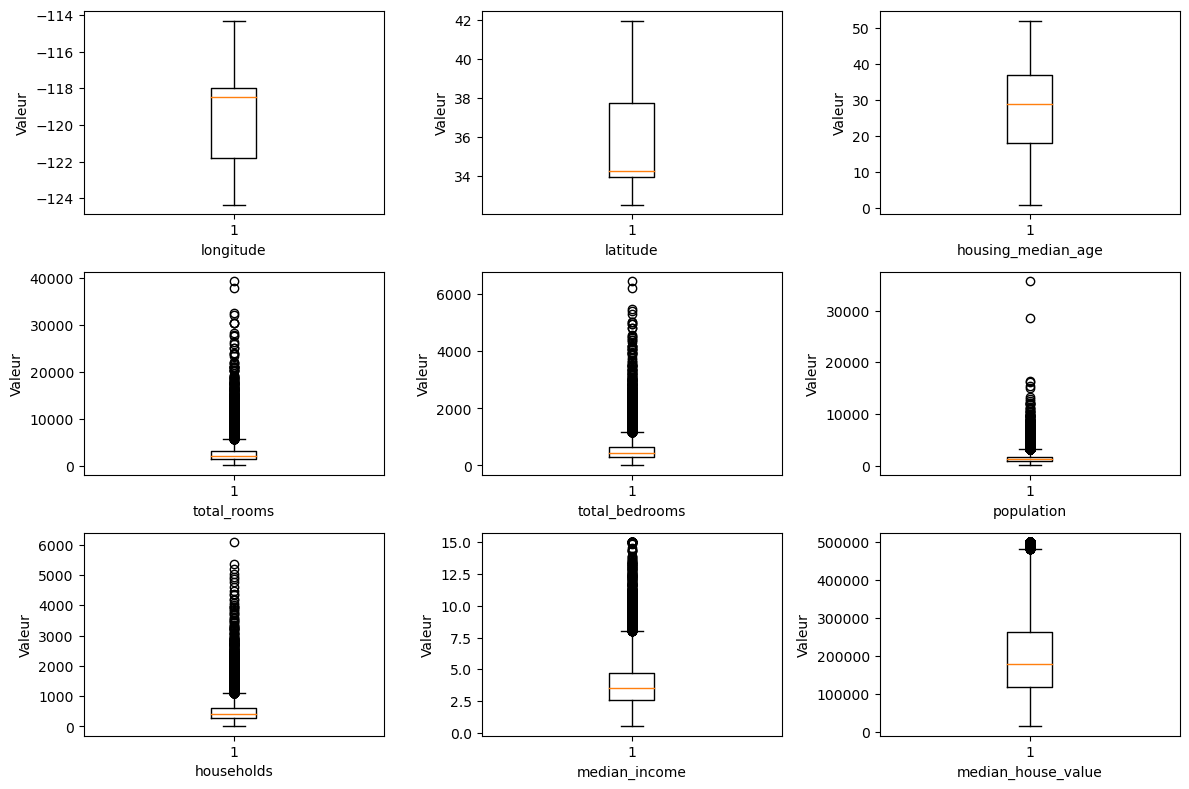

In [8]:
quant_vars = data.select_dtypes(include=np.number).columns
# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].boxplot(data[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()

## Description de la variable catégorielle 'ocean_proximity'

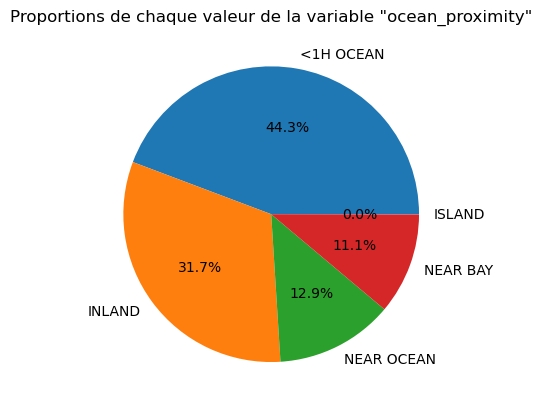

In [9]:


# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

# Création du pie chart
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('Proportions de chaque valeur de la variable "ocean_proximity"')
plt.show()

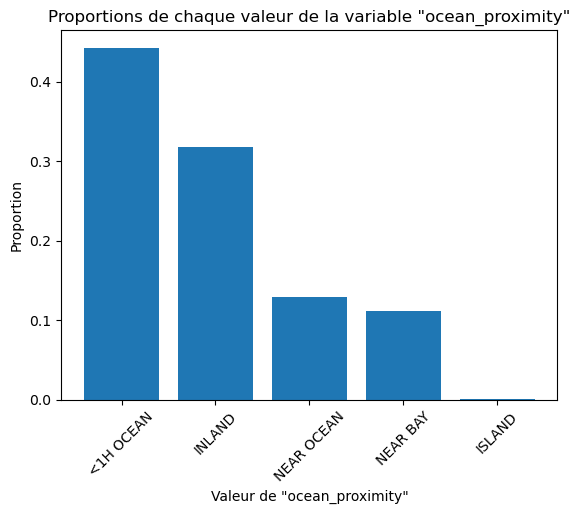

In [10]:

# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

# Création du barplot
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=45)
plt.xlabel('Valeur de "ocean_proximity"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "ocean_proximity"')
plt.show()

# Analyses bivariées et sélection des variables pertinentes

## Corrélation entre les variables numériques

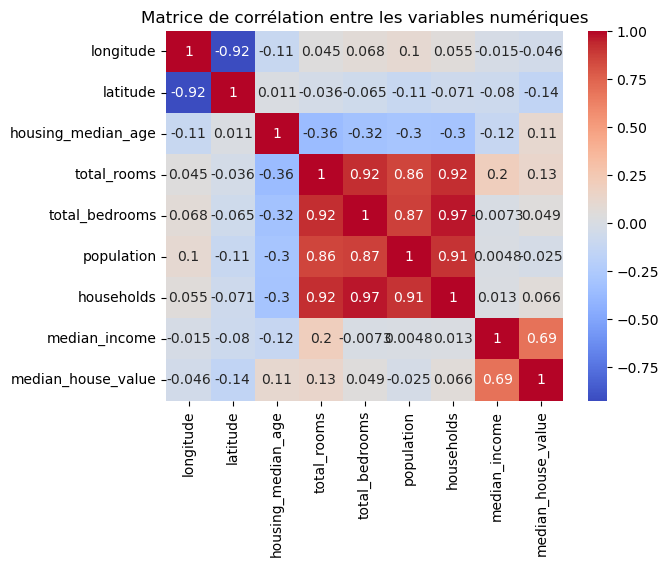

In [11]:
import seaborn as sns
# Corrélation entre les variables numériques
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


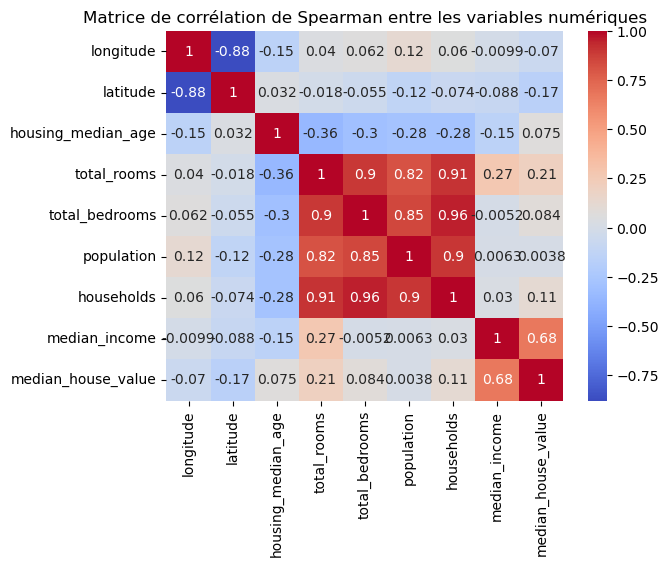

In [12]:
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns
# Calcul de la matrice de corrélation de Spearman
corr_matrix = data[num_vars].corr(method='spearman')

# Affichage de la matrice de corrélation de Spearman
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de Spearman entre les variables numériques')
plt.show()

## Relation entre la variable cible 'median_house_value' et les variables numériques

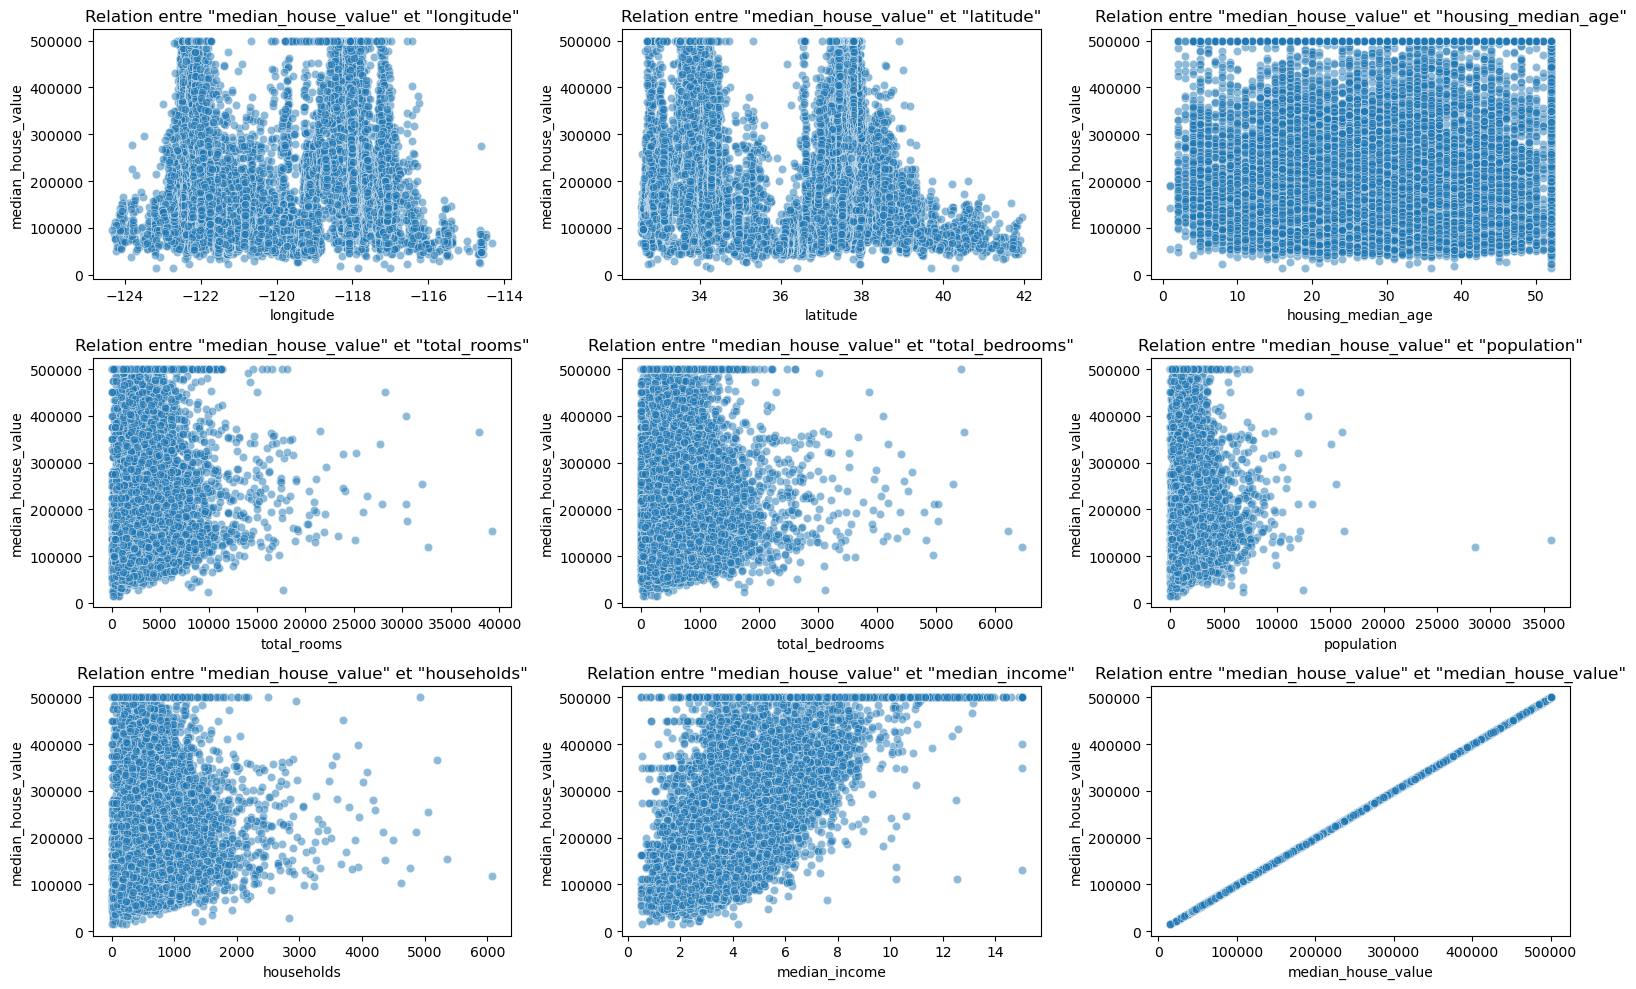

In [13]:
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 3
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='median_house_value', data=data, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "median_house_value" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()


## Relation entre la variable cible 'median_house_value' et la variable catégorielle 'ocean_proximity'


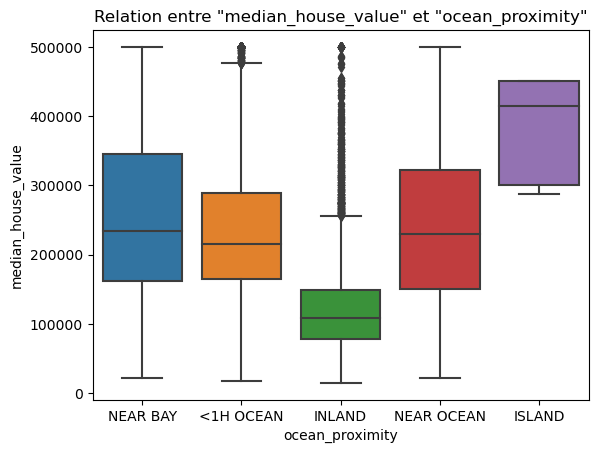

In [14]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Relation entre "median_house_value" et "ocean_proximity"')
plt.show()


## Relation entre les variables numériques

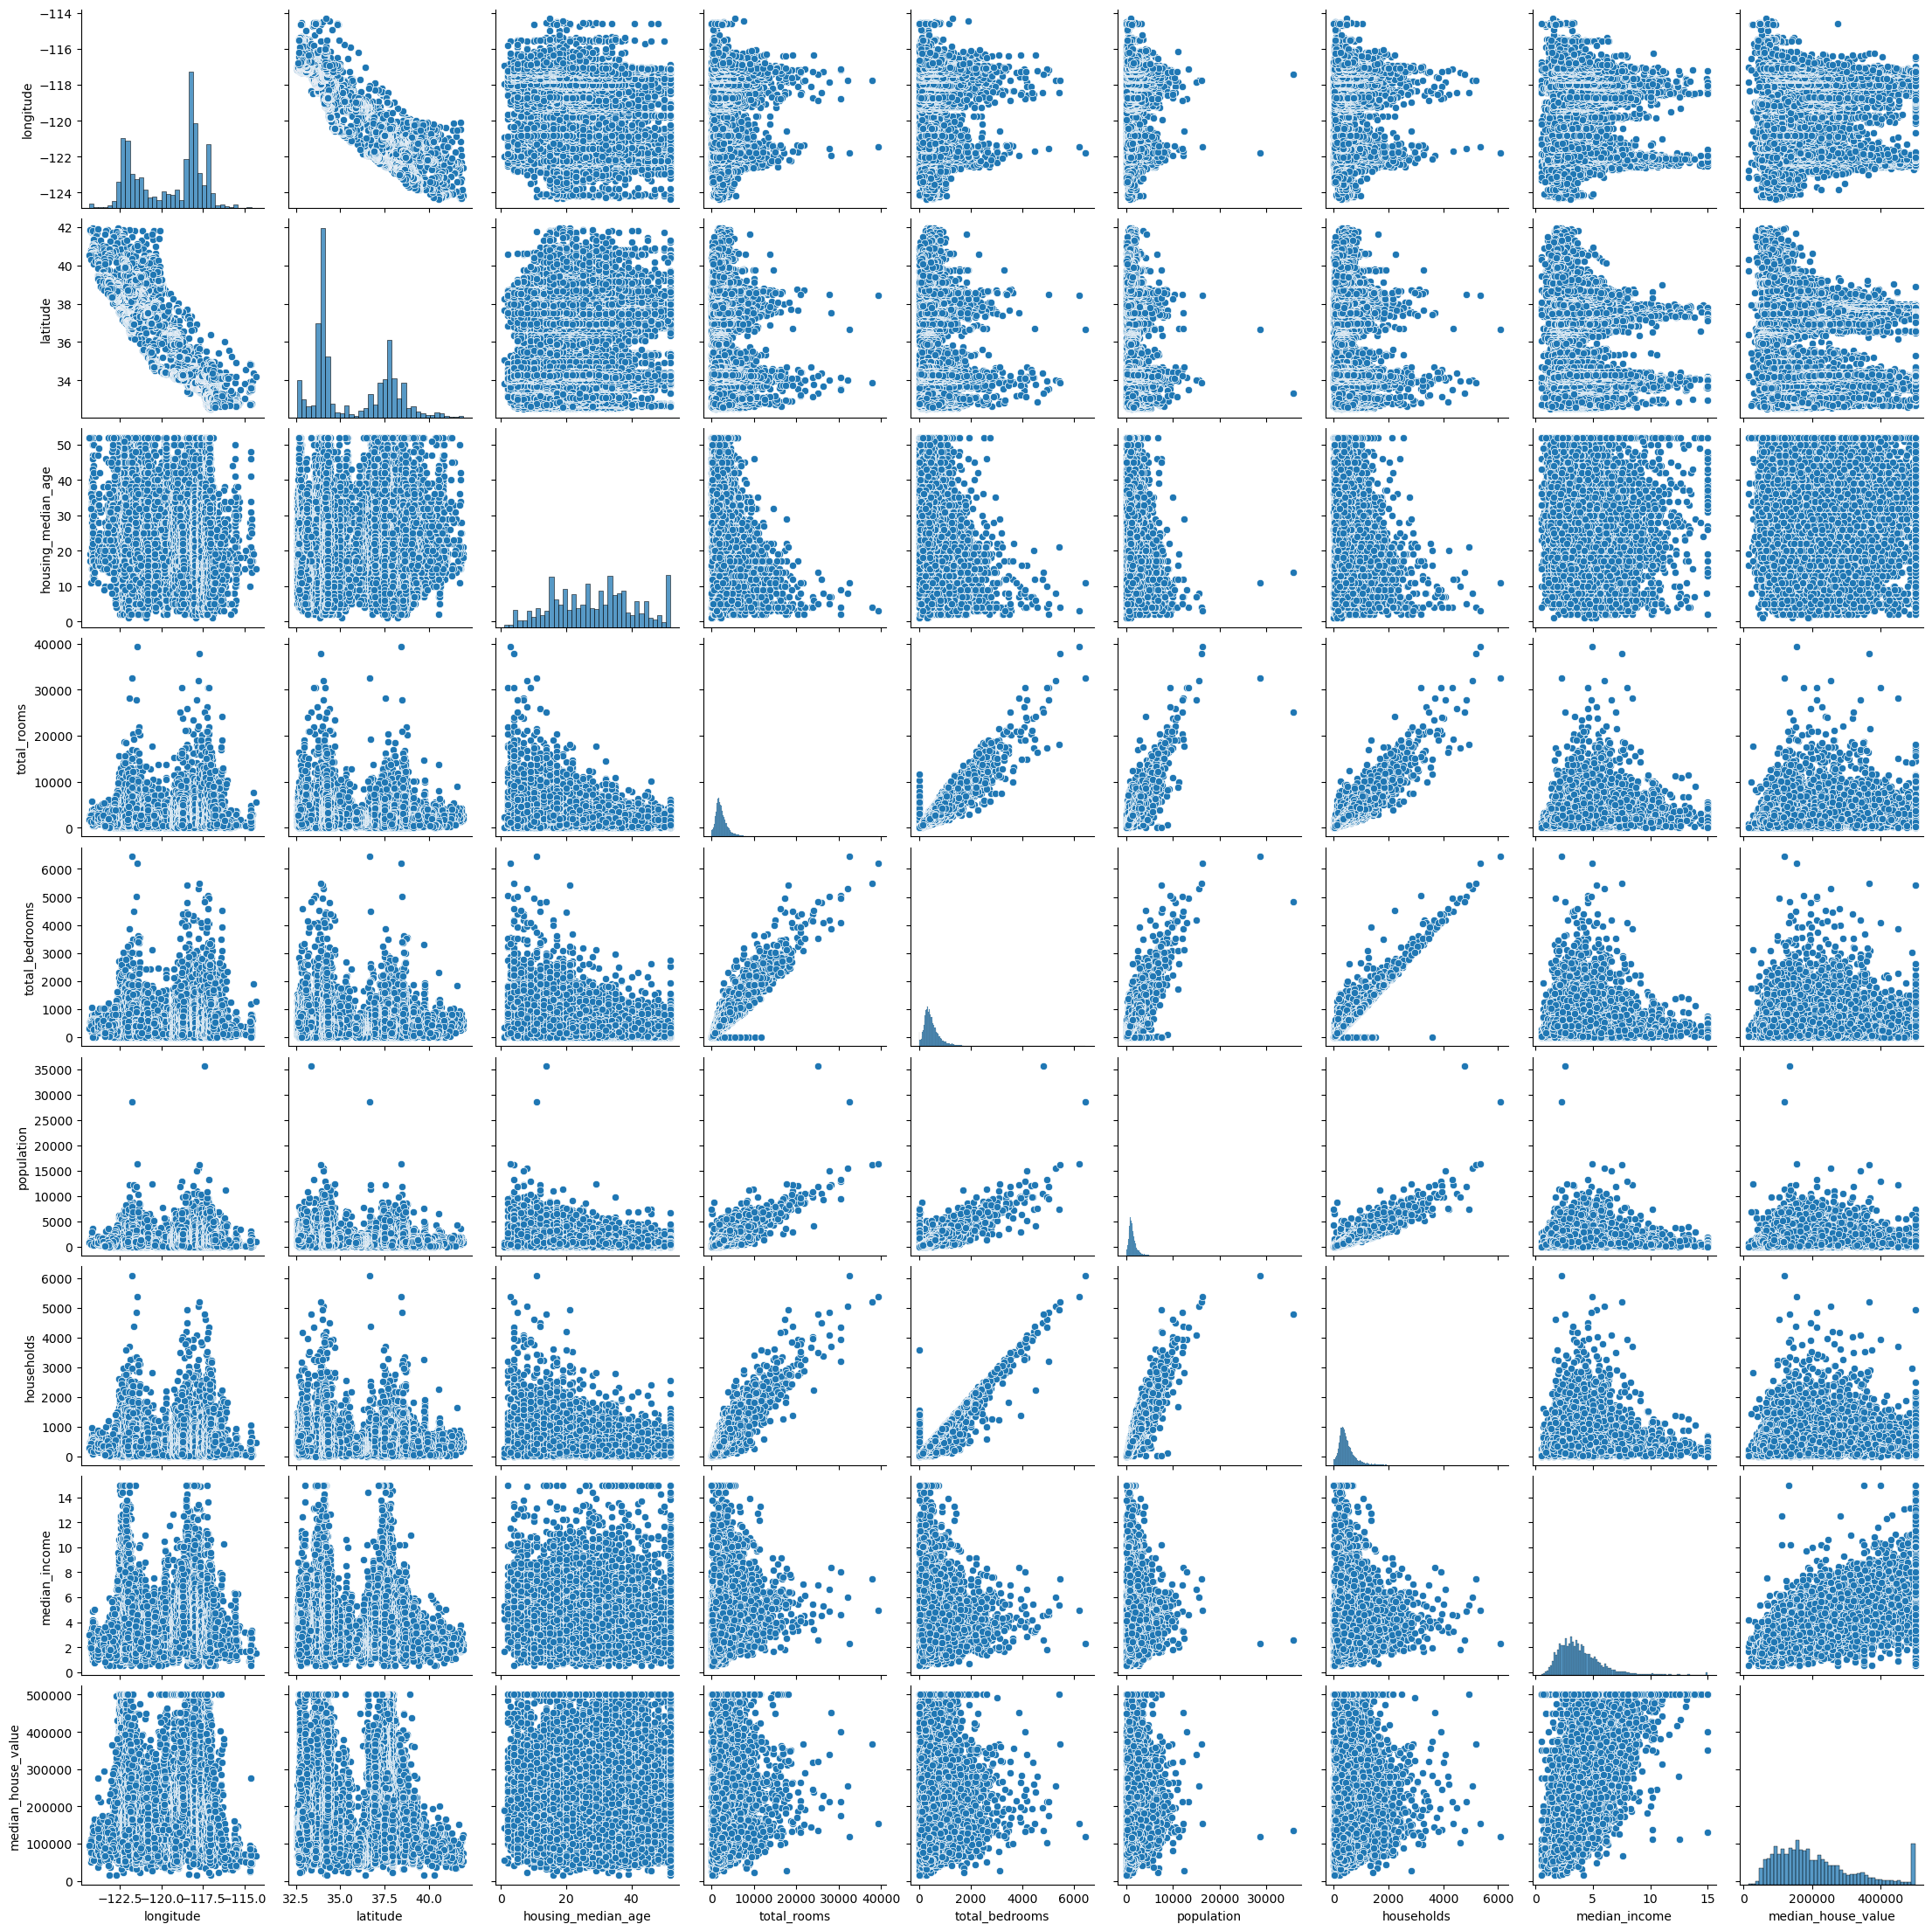

In [15]:
sns.pairplot(data[num_vars])
plt.show()

# Modélisation du prix du bien immobilier

## Variables

In [16]:
from sklearn.preprocessing import OneHotEncoder
# Sélection des variables catégorielles
cat_vars = ['ocean_proximity']

# Encodage binaire des variables catégorielles
encoder = OneHotEncoder(sparse=False)
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_vars]))
cat_data.columns = encoder.get_feature_names_out(cat_vars)

# Remplacement des variables catégorielles par les variables encodées
data = pd.concat([data.drop(cat_vars, axis=1), cat_data], axis=1)
data


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20640 rows x 14 columns]

In [17]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20640 rows x 14 columns]

In [18]:
# Séparation des données en variables explicatives et variable cible
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [20]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

## Diviser la base en train en test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Arbre de régression non optimisé

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


In [ ]:
# Affichage de l'arbre
plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()

In [ ]:
# Affichage de l'importance des variables
importances = pd.Series(tree.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score,r2_score,mean_squared_error


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Graphique pour la base d'entraînement
y_train_pred = tree.predict(X_train)
axs[0].scatter(y_train, y_train_pred, alpha=0.5)
axs[0].plot([0, np.max(y_train)], [0, np.max(y_train)], 'r--')
axs[0].set_xlabel('Valeurs observées')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Base d\'entraînement')

# Graphique pour la base de test
y_test_pred = tree.predict(X_test)
axs[1].scatter(y_test, y_test_pred, alpha=0.5)
axs[1].plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
axs[1].set_xlabel('Valeurs observées')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Base de test')

# Affichage des graphiques
plt.tight_layout()
plt.show()

## Arbre optimisé avec un élagage (prunning)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres
param_grid = {'max_depth': np.arange(1, 21)}

# Instanciation de l'estimateur de l'arbre de décision
tree = DecisionTreeRegressor(random_state=42)

# Instanciation de l'objet GridSearchCV
grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement de l'objet GridSearchCV
grid_tree.fit(X_train, y_train)

# Affichage de la profondeur optimale
print("Profondeur optimale :", grid_tree.best_params_['max_depth'])

# Affichage de la courbe de validation croisée pour la profondeur de l'arbre
plt.plot(param_grid['max_depth'], np.sqrt(-grid_tree.cv_results_['mean_test_score']))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('RMSE')
plt.title('Validation croisée pour la profondeur de l\'arbre')
plt.show()

In [ ]:
# Entrainement d'un nouvel arbre avec la profondeur optimale
tree_optimal = DecisionTreeRegressor(max_depth=grid_tree.best_params_['max_depth'], random_state=42)
tree_optimal.fit(X_train, y_train)

In [ ]:
# Affichage de l'importance des variables
importances = pd.Series(tree_optimal.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Afficher l'arbre optimal

In [ ]:
# Affichage de l'arbre
plt.figure(figsize=(15,10))
plot_tree(tree_optimal, feature_names=X_train.columns, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree_optimal.predict(X_train)
y_test_pred = tree_optimal.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Graphique pour la base d'entraînement
y_train_pred = tree_optimal.predict(X_train)
axs[0].scatter(y_train, y_train_pred, alpha=0.5)
axs[0].plot([0, np.max(y_train)], [0, np.max(y_train)], 'r--')
axs[0].set_xlabel('Valeurs observées')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Base d\'entraînement')

# Graphique pour la base de test
y_test_pred = tree_optimal.predict(X_test)
axs[1].scatter(y_test, y_test_pred, alpha=0.5)
axs[1].plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
axs[1].set_xlabel('Valeurs observées')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Base de test')

# Affichage des graphiques
plt.tight_layout()
plt.show()

## Tester une autre coupure de l'arbre

In [ ]:
# Entrainement d'un nouvel arbre avec la profondeur optimale
tree_other = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_other.fit(X_train, y_train)

In [ ]:
# Affichage de l'importance des variables
importances = pd.Series(tree_other.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Affichage de l'arbre
plt.figure(figsize=(15,10))
plot_tree(tree_other, feature_names=X_train.columns, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree_other.predict(X_train)
y_test_pred = tree_other.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

# QUIZZ



1. Quel est l'objectif principal de l'optimisation de l'arbre de régression ?
   - a) Trouver la profondeur maximale de l'arbre
   - b) Trouver les critères optimaux pour la sélection des attributs
   - c) Minimiser l'erreur quadratique moyenne
   - d) Maximiser l'expliquabilité de l'arbre

2. Comment peut-on éviter le surajustement de l'arbre de régression ?
   - a) En augmentant la profondeur maximale de l'arbre
   - b) En réduisant la profondeur maximale de l'arbre
   - c) En choisissant un critère de sélection d'attributs qui favorise la complexité de l'arbre
   - d) En augmentant la taille du jeu de données d'entraînement

3. Quel est le critère de sélection d'attributs le plus communément utilisé pour l'arbre de régression en Python ?
   - a) mse
   - b) gini
   - c) entropy
   - d) friedman_mse

4. Comment peut-on trouver la profondeur maximale optimale de l'arbre de régression en Python ?
   - a) En utilisant la validation croisée
   - b) En utilisant la méthode RFE (Recursive Feature Elimination)
   - c) En utilisant le critère de Bayes
   - d) En choisissant la profondeur maximale manuellement



# Modèle de Forêt Aléatoire pour la régressionn

## Préparation des données pour le modèle

In [ ]:


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Premier modèle sans optimisation

### Estimation du modèle

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score


# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)



### Prédiction sur la base train et la base test

In [ ]:

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Evaluation des performances

In [ ]:

# Calcul des métriques de performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rms_train = mean_squared_error(y_train, y_train_pred, squared=False)
rms_test = mean_squared_error(y_test, y_test_pred, squared=False)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrique': ['R²', 'RMS', 'Score expliqué'],
    'Ensemble d\'entraînement': [r2_train, rms_train, explained_var_train],
    'Ensemble de test': [r2_test, rms_test, explained_var_test]
})
print(performance_table)

### Importance des variables

In [ ]:
# Obtenir l'importance des variables
importance = model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
print(importance_df)

In [ ]:
# Graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

## Modèle avec optimisation par validation croisée

### Estimation du modèle

In [ ]:

# Définir les paramètres à tester
param_grid = {
    'n_estimators': [100, 500],
     'max_depth': [None, 5 ,10]
}

# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(random_state=42)

# Recherche par grille pour optimiser les paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", grid_search.best_params_)



### Prédiction sur la base train et la base test

In [ ]:
# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


### Evaluation des performances

In [ ]:

# Calcul des métriques d'évaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Création du tableau de résultats
evaluation_table = pd.DataFrame({
    'Métrique': ['R²', 'MSE', 'Score expliqué'],
    'Ensemble d\'entraînement': [r2_train, mse_train, explained_var_train],
    'Ensemble de test': [r2_test, mse_test, explained_var_test]
})
# Affichage du tableau de résultats
print(evaluation_table)

### Importance des variables

In [ ]:
# Obtenir l'importance des variables
importance = best_model.feature_importances_

# Création du tableau d'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage du tableau d'importance des variables
print(importance_df)

# Graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

## Optimisation via RandomizedSearchCV



La classe `RandomizedSearchCV` de scikit-learn est utilisée pour effectuer une recherche aléatoire des meilleurs hyperparamètres d'un modèle d'apprentissage automatique. Elle permet d'explorer de manière efficace un grand espace de recherche d'hyperparamètres en échantillonnant un sous-ensemble aléatoire de combinaisons possibles.

#### Avantages de RandomizedSearchCV :

- **Efficacité** : RandomizedSearchCV réduit le temps de recherche en n'évaluant qu'un nombre fixe de combinaisons aléatoires d'hyperparamètres, ce qui le rend plus rapide que la recherche par grille (GridSearchCV) qui évalue toutes les combinaisons possibles.
- **Évite le surajustement** : En échantillonnant aléatoirement les hyperparamètres, RandomizedSearchCV évite le risque de surajustement en explorant une plus grande variété de combinaisons.
- **Évolutivité** : Il est possible d'ajuster la durée de la recherche en fixant le nombre d'itérations (n_iter) pour contrôler la quantité d'essais de combinaisons d'hyperparamètres.

#### Inconvénients de RandomizedSearchCV :

- **Pas de garantie de la meilleure solution** : Comme RandomizedSearchCV explore un sous-ensemble aléatoire d'hyperparamètres, il est possible qu'il ne trouve pas la meilleure combinaison possible. Il y a une chance qu'il manque certaines combinaisons qui pourraient donner de meilleurs résultats.
- **Dépendance de la distribution des échantillons** : Le choix de la distribution des échantillons pour les hyperparamètres peut avoir un impact sur les résultats. Si la distribution est mal choisie, certains hyperparamètres peuvent être sous-évalués ou négligés.
- **Moins de contrôle sur les valeurs spécifiques** : Contrairement à la recherche par grille, RandomizedSearchCV ne permet pas de spécifier des valeurs spécifiques pour les hyperparamètres. Il peut être plus difficile de cibler des valeurs spécifiques à tester.

En résumé, RandomizedSearchCV est une approche efficace et évolutive pour trouver de bons hyperparamètres dans un espace de recherche, mais il ne garantit pas la meilleure solution et nécessite une certaine exploration pour trouver les combinaisons les plus performantes.

Pour utiliser RandomizedSearchCV, il est important de bien comprendre ses avantages et ses inconvénients, ainsi que de l'adapter en fonction des besoins spécifiques du problème d'apprentissage automatique.


### Estimation du modèle

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(random_state=42)

# Recherche aléatoire pour optimiser les paramètres
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='r2', n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", random_search.best_params_)


### Prédiction sur la base train et test

In [ ]:
# Obtenir le meilleur modèle
best_model = random_search.best_estimator_


# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)



In [ ]:
### Evaluation des performances du modèle

In [ ]:
# Calcul des métriques d'évaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

explained_var_train = explained_variance_score(y_train, y_train_pred)
explained_var_test = explained_variance_score(y_test, y_test_pred)

# Création du tableau de performances
performance_table = pd.DataFrame({
    'Métrique': ['R²', 'MSE', 'Variance expliquée'],
    'Ensemble d\'entraînement': [r2_train, mse_train, explained_var_train],
    'Ensemble de test': [r2_test, mse_test, explained_var_test]
})

# Affichage du tableau de performances
print(performance_table)

### Importance des variables

In [ ]:
# Obtenir l'importance des variables
importance = best_model.feature_importances_

# Création du tableau d'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage du tableau d'importance des variables
print(importance_df)

# Graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

# Quizz

## Quiz sur les forêts aléatoires pour la régression en Python

1. Qu'est-ce qu'une forêt aléatoire de régression ?
   - A. Un algorithme utilisé pour la classification
   - B. Un modèle de régression linéaire
   - C. Une combinaison d'arbres de décision pour la régression
   - D. Un algorithme de clustering

2. Comment peut-on optimiser les paramètres d'une forêt aléatoire de régression ?
   - A. En utilisant une recherche par grille (grid search) ou une recherche aléatoire (random search)
   - B. En ajustant manuellement les paramètres jusqu'à obtenir de bons résultats
   - C. En utilisant une régression logistique pour trouver les meilleurs paramètres
   - D. En ne modifiant pas les paramètres par défaut

3. Qu'est-ce que l'importance des variables dans une forêt aléatoire de régression ?
   - A. C'est une mesure de la corrélation entre les variables explicatives
   - B. C'est une mesure de l'influence des variables sur la variable cible
   - C. C'est une mesure du nombre de fois où une variable est sélectionnée pour diviser les nœuds
   - D. C'est une mesure de la variabilité des prédictions du modèle

4. Comment évalue-t-on la performance d'une forêt aléatoire de régression ?
   - A. En utilisant le coefficient de détermination R²
   - B. En utilisant l'erreur quadratique moyenne (MSE)
   - C. En utilisant le score expliqué
   - D. Toutes les réponses précédentes


# Modèle Adaboost

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error



In [23]:
# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Création d'une instance de DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Création de l'AdaBoost avec un DecisionTreeRegressor comme base
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),random_state=42)


In [24]:
# Paramètres à optimiser
parameters = {
    # n_estimators est le nombre d'arbres (modèles de base) à utiliser dans l'algorithme d'AdaBoost.
    # Plus il y a d'arbres, plus le modèle peut capturer des informations, mais cela augmente également la complexité du modèle et le temps de calcul.
    'n_estimators': [50, 100, 200],

    # learning_rate est le taux d'apprentissage qui réduit la contribution de chaque classificateur.
    # Un taux d'apprentissage plus bas signifie que le modèle apprend plus lentement, ce qui peut aider à améliorer la performance, mais cela nécessite également plus d'arbres (n_estimators) pour obtenir de bons résultats.
    'learning_rate': [0.01, 0.1, 1]
}

In [25]:
# Création du GridSearchCV
grid_search = GridSearchCV(ada_boost, parameters, cv=5, n_jobs=-1, verbose=1)

# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Calcul du temps de calcul
elapsed_time = time.time() - start_time
print(f"Temps de calcul : {elapsed_time:.2f} secondes")

# Affichage des meilleurs paramètres
print("Best parameters set:")
print(grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Temps de calcul : 70.72 secondes
Best parameters set:
{'learning_rate': 1, 'n_estimators': 200}


In [33]:
def model_performance(model, X_train, X_test, y_train, y_test):
    # Prédictions sur l'ensemble d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcul des mesures de performance
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Création du DataFrame
    performance = pd.DataFrame({
        'Score': ['R2', 'RMSE', 'MAE'],
        'Train': [r2_train, rmse_train, mae_train],
        'Test': [r2_test, rmse_test, mae_test]
    })

    return performance

In [34]:
performance = model_performance(grid_search, X_train, X_test, y_train, y_test)
print(performance)

  Score        Train          Test
0    R2     0.999446      0.822635
1  RMSE  2722.320428  48210.070814
2   MAE   924.436955  29731.762597


                       Feature  Importance
10      ocean_proximity_ISLAND    0.000267
11    ocean_proximity_NEAR BAY    0.001207
8    ocean_proximity_<1H OCEAN    0.004039
12  ocean_proximity_NEAR OCEAN    0.006172
6                   households    0.042367
4               total_bedrooms    0.052095
3                  total_rooms    0.053751
2           housing_median_age    0.073703
5                   population    0.079446
9       ocean_proximity_INLAND    0.099054
1                     latitude    0.139833
0                    longitude    0.141135
7                median_income    0.306933


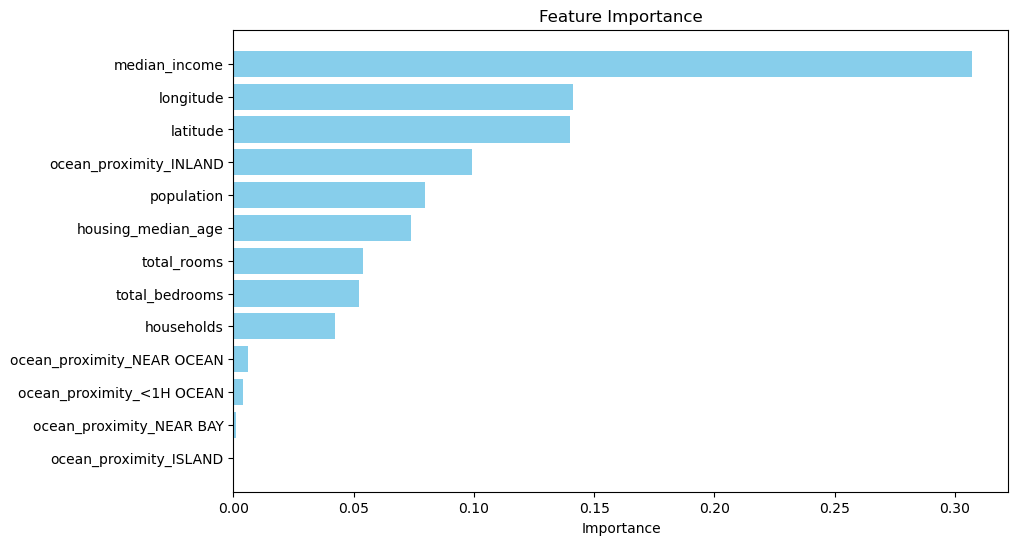

In [35]:

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator_

# Calculer l'importance des features
feature_importance = best_model.feature_importances_

# Créer un DataFrame pour l'importance des features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Trier le DataFrame par importance en ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Afficher le DataFrame
print(feature_importance_df)

# Tracer un graphique d'importance des features
plt.figure(figsize=(10, 6))
plt.barh(y=feature_importance_df['Feature'], width=feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Modèle XGBoost

In [37]:
import xgboost as xgb

In [38]:
X_train.columns = X_train.columns.str.replace('<', '') # Replace < character
X_test.columns = X_test.columns.str.replace('<', '') # Replace < character

In [39]:
# Définition de l'objet XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Paramètres à optimiser
parameters = {
    # n_estimators représente le nombre d'arbres à construire. Plus ce nombre est élevé, plus le modèle sera complexe.
    'n_estimators': [100, 200, 500],

    # max_depth représente la profondeur maximale de chaque arbre. Un nombre plus élevé rend le modèle plus complexe.
    'max_depth': [2, 4, 6,7],

    # learning_rate (ou taux d'apprentissage) détermine à quel point chaque arbre corrige les erreurs des arbres précédents.
    'learning_rate': [0.01, 0.1,1],

    # min_child_weight contrôle le surapprentissage. Plus la valeur est élevée, plus le modèle est conservateur.
    'min_child_weight': [1, 3, 5]
}

In [40]:
# Création du GridSearchCV
grid_search = GridSearchCV(xgb_reg, parameters, cv=5, n_jobs=-1, verbose=1)

# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Calcul du temps de calcul
elapsed_time = time.time() - start_time
print(f"Temps de calcul : {elapsed_time:.2f} secondes")

# Affichage des meilleurs paramètres
print("Best parameters set:")
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Temps de calcul : 150.81 secondes
Best parameters set:
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500}


In [41]:
performance=model_performance(grid_search.best_estimator_, X_train, X_test, y_train, y_test)
performance


Score         Train          Test
0    R2      0.970988      0.821176
1  RMSE  19693.164096  48407.892115
2   MAE  13609.655829  31866.501685

                       Feature  Importance
10      ocean_proximity_ISLAND    0.000000
3                  total_rooms    0.007766
6                   households    0.009133
4               total_bedrooms    0.014272
11    ocean_proximity_NEAR BAY    0.014347
5                   population    0.014443
8    ocean_proximity_<1H OCEAN    0.021073
2           housing_median_age    0.021474
1                     latitude    0.027992
0                    longitude    0.029404
12  ocean_proximity_NEAR OCEAN    0.036794
7                median_income    0.133242
9       ocean_proximity_INLAND    0.670061


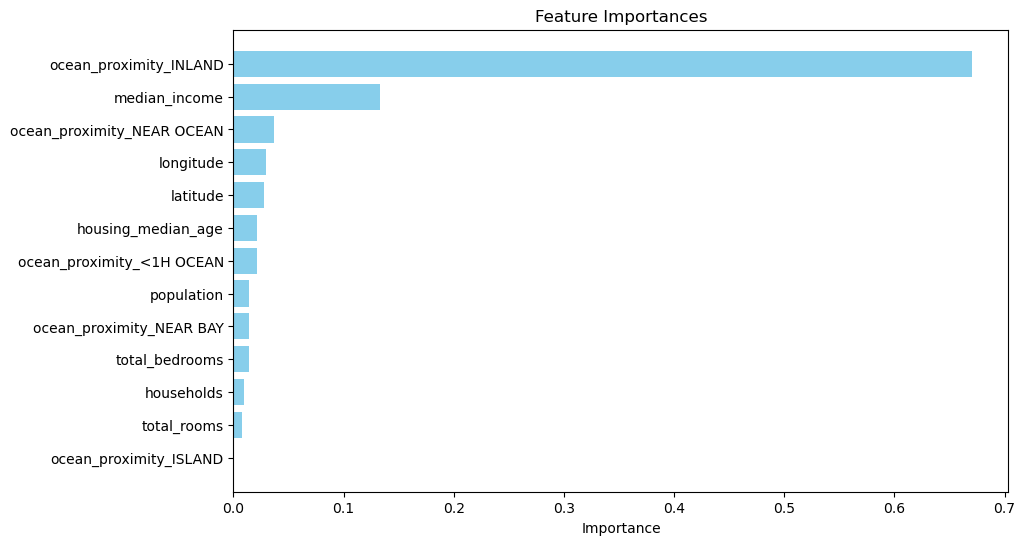

In [42]:
# Obtention des importances des caractéristiques
feature_importances = grid_search.best_estimator_.feature_importances_

# Création d'un DataFrame pour l'affichage
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Classement par ordre croissant d'importance
importances_df = importances_df.sort_values(by='Importance', ascending=True)

print(importances_df)
# Affichage d'un graphique d'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Modèle LightGBM

In [43]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Création d'une instance de LGBMRegressor
lgbm = LGBMRegressor(random_state=42)

# Paramètres à optimiser
parameters = {
    # max_depth contrôle la profondeur maximale des arbres. Un arbre plus profond peut capturer plus de relations, mais peut aussi causer un surapprentissage.
    'max_depth': [10, 20, 30],
    # n_estimators contrôle le nombre d'arbres à construire. Plus il y a d'arbres, plus le modèle est robuste, mais cela augmente aussi le temps de calcul.
    'n_estimators': [100, 200, 300],
    # learning_rate est le taux d'apprentissage qui réduit la contribution de chaque arbre. Un taux plus faible nécessite plus d'arbres pour obtenir de bons résultats.
    'learning_rate': [0.01, 0.1, 1],
}

In [45]:
# Création du GridSearchCV
grid_search = GridSearchCV(lgbm, parameters, cv=5, n_jobs=-1, verbose=1)

# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

# Meilleurs paramètres
print("Best parameters set:")
print(grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Temps d'exécution : 5.64 secondes
Best parameters set:
{'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 300}


In [46]:
performance=model_performance(grid_search.best_estimator_, X_train, X_test, y_train, y_test)
performance


Score         Train          Test
0    R2      0.921575      0.840587
1  RMSE  32378.598980  45705.106063
2   MAE  22366.250049  30358.987851

                       Feature  Importance
10      ocean_proximity_ISLAND           0
11    ocean_proximity_NEAR BAY          37
12  ocean_proximity_NEAR OCEAN          76
8    ocean_proximity_<1H OCEAN          88
9       ocean_proximity_INLAND         107
6                   households         643
4               total_bedrooms         740
3                  total_rooms         855
2           housing_median_age         862
5                   population        1050
7                median_income        1398
0                    longitude        1545
1                     latitude        1599


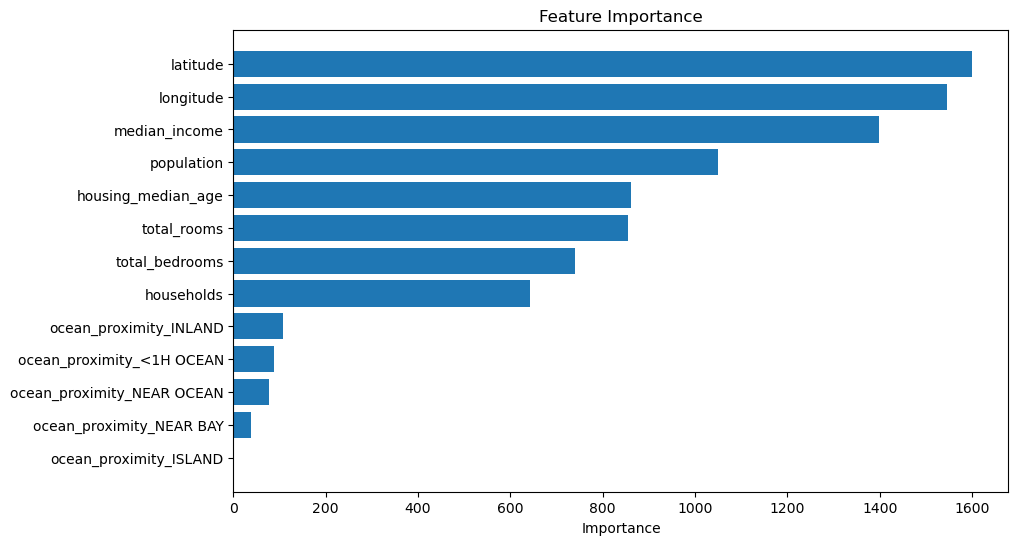

In [47]:
# Importance des features
best_model = grid_search.best_estimator_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})

# Trier par importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Affichage de l'importance des features
print(importance_df)

# Tracer un graphique d'importance des features
plt.figure(figsize=(10, 6))
plt.barh(y=importance_df['Feature'], width=importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Modèle Catboost

In [48]:
from catboost import CatBoostRegressor

In [49]:
# Création d'une instance de CatBoostRegressor
catboost = CatBoostRegressor(random_state=42) 


In [50]:
# Paramètres à optimiser
parameters = {
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
}


In [53]:
# Création du GridSearchCV
grid_search = GridSearchCV(catboost, parameters, cv=5, n_jobs=-1, verbose=0)

# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

# Meilleurs paramètres
print("Best parameters set:")
print(grid_search.best_params_)

89:	learn: 28766.1421704	total: 625ms	remaining: 764ms
90:	learn: 28646.8421436	total: 633ms	remaining: 758ms
91:	learn: 28514.6940623	total: 638ms	remaining: 749ms
92:	learn: 28374.7360908	total: 644ms	remaining: 740ms
93:	learn: 28198.7244623	total: 652ms	remaining: 735ms
94:	learn: 28116.2505896	total: 661ms	remaining: 730ms
95:	learn: 27960.3059256	total: 671ms	remaining: 726ms
96:	learn: 27782.4421843	total: 680ms	remaining: 722ms
97:	learn: 27640.4725673	total: 686ms	remaining: 714ms
98:	learn: 27446.3762078	total: 692ms	remaining: 706ms
99:	learn: 27339.4357696	total: 698ms	remaining: 698ms
100:	learn: 27152.2281772	total: 703ms	remaining: 689ms
101:	learn: 27050.5701483	total: 708ms	remaining: 680ms
102:	learn: 26975.8023676	total: 713ms	remaining: 671ms
103:	learn: 26886.8418877	total: 723ms	remaining: 668ms
104:	learn: 26708.9349815	total: 731ms	remaining: 661ms
105:	learn: 26614.5210133	total: 736ms	remaining: 653ms
106:	learn: 26537.8658804	total: 741ms	remaining: 644ms
107

In [54]:
performance=model_performance(grid_search.best_estimator_, X_train, X_test, y_train, y_test)
performance


Score         Train          Test
0    R2      0.894437      0.834432
1  RMSE  37565.203756  46579.191080
2   MAE  26160.521804  31037.359869

                       Feature  Importance
10      ocean_proximity_ISLAND    0.000000
8    ocean_proximity_<1H OCEAN    0.761004
11    ocean_proximity_NEAR BAY    0.976508
12  ocean_proximity_NEAR OCEAN    1.628945
3                  total_rooms    2.704147
6                   households    2.990119
4               total_bedrooms    3.491022
2           housing_median_age    6.223648
5                   population    7.039942
9       ocean_proximity_INLAND   14.472437
1                     latitude   14.584190
0                    longitude   16.655140
7                median_income   28.472898


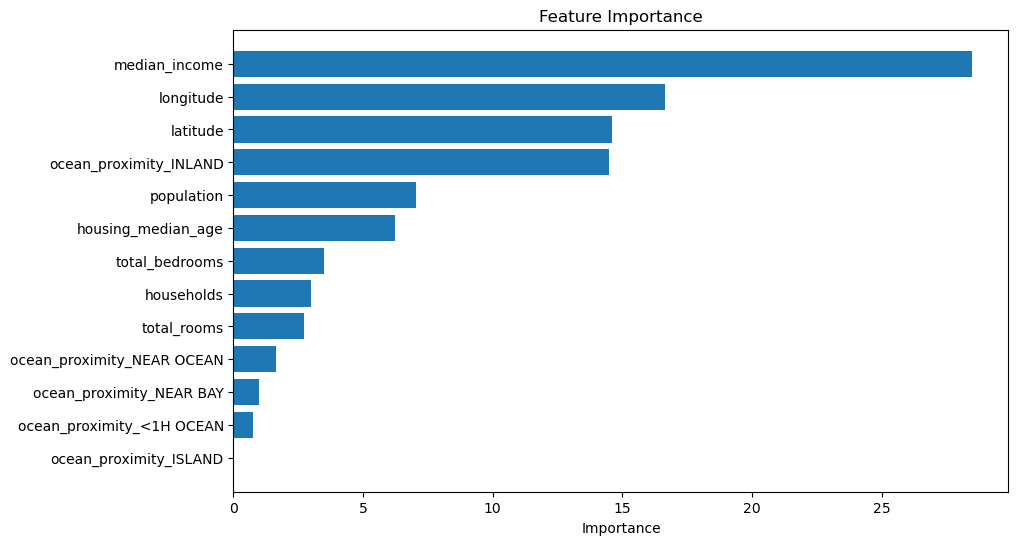

41:	learn: 55122.3023896	total: 342ms	remaining: 2.1s
42:	learn: 54924.4474027	total: 352ms	remaining: 2.1s
43:	learn: 54740.9915347	total: 357ms	remaining: 2.08s
44:	learn: 54431.4501570	total: 364ms	remaining: 2.06s
45:	learn: 54072.0124731	total: 367ms	remaining: 2.03s
46:	learn: 53695.7198915	total: 372ms	remaining: 2s
47:	learn: 53412.8939689	total: 390ms	remaining: 2.05s
48:	learn: 53251.8512928	total: 396ms	remaining: 2.03s
49:	learn: 53100.0755331	total: 406ms	remaining: 2.03s
50:	learn: 52992.4994535	total: 414ms	remaining: 2.02s
51:	learn: 52829.8527818	total: 421ms	remaining: 2.01s
52:	learn: 52588.5435766	total: 427ms	remaining: 1.99s
53:	learn: 52429.8259148	total: 432ms	remaining: 1.97s
54:	learn: 52254.3888914	total: 441ms	remaining: 1.97s
55:	learn: 52050.1093653	total: 455ms	remaining: 1.98s
56:	learn: 51918.2575110	total: 462ms	remaining: 1.97s
57:	learn: 51765.4099538	total: 466ms	remaining: 1.95s
58:	learn: 51632.3259430	total: 471ms	remaining: 1.93s
59:	learn: 5147

In [55]:
# Importance des features
best_model = grid_search.best_estimator_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})

# Trier par importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Affichage de l'importance des features
print(importance_df)

# Tracer un graphique d'importance des features
plt.figure(figsize=(10, 6))
plt.barh(y=importance_df['Feature'], width=importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()




